***
***
***

# Apprentice Chef | Classification Predictive Analysis<br>
<strong>Machine Learning</strong> <br>
Thiago Marcondes <br>
Prof.: Chase Kusterer <br>
Hult International Business School 

***
***

## Agenda

1. Introduction
2. Feature Engineering
3. Exploratory analysis
4. Classification Models
5. Conclusion
***

<h3> Introduction </h3>

The purpose of the analysis is to build a model to predict the success of Halfway There, a cross-selling promotion where subscribers receive a bottle of wine from a local California vineyard every Wednesday. To achieve that, our focus will be, first, understanding and cleaning the data, what will make sure that the dataset is ready to be analyzed. Secondly, to dive deeper on the most impactful KPIs on the cross-selling promotion. Finally, we will test different classification models with the most significant variables to get business insights and choose one to predict the success of the promotion.

***
<h3> Feature Engineering </h3>

In [2]:
# Importing necessary packages: 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random as rand
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

C:\Users\thiag\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
# Reading external file: 
file = 'Apprentice_Chef_Dataset.xlsx'
app_chef = pd.read_excel(file)

In [4]:
# Changing column names: 
# Changing variable names
app_chef = app_chef.rename(columns={'REVENUE'                     :'revenue',
                                    'CROSS_SELL_SUCCESS'          :'cross_sell',
                                    'NAME'                        :'name',
                                    'EMAIL'                       :'email',
                                    'FIRST_NAME'                  :'first_name',
                                    'FAMILY_NAME'                 :'family_name',
                                    'TOTAL_MEALS_ORDERED'         :'total_meals',
                                    'UNIQUE_MEALS_PURCH'          :'unique_meals',
                                    'CONTACTS_W_CUSTOMER_SERVICE' :'contact_cust_serv',
                                    'PRODUCT_CATEGORIES_VIEWED'   :'prod_cat_view',
                                    'AVG_TIME_PER_SITE_VISIT'     :'avg_time_vis',
                                    'MOBILE_NUMBER'               :'mob_number',
                                    'CANCELLATIONS_BEFORE_NOON'   :'early_cancel',
                                    'CANCELLATIONS_AFTER_NOON'    :'late_cancel',
                                    'TASTES_AND_PREFERENCES'      :'tastes_pref',
                                    'PC_LOGINS'                   :'pc_logins',
                                    'MOBILE_LOGINS'               :'mob_logins',
                                    'WEEKLY_PLAN'                 :'week_plan',
                                    'EARLY_DELIVERIES'            :'early_deliv',
                                    'LATE_DELIVERIES'             :'late_deliv',
                                    'PACKAGE_LOCKER'              :'pack_lock',
                                    'REFRIGERATED_LOCKER'         :'ref_lock',
                                    'FOLLOWED_RECOMMENDATIONS_PCT':'follow_rec_pct',
                                    'AVG_PREP_VID_TIME'           :'avg_prep_time',
                                    'LARGEST_ORDER_SIZE'          :'larger_order',
                                    'MASTER_CLASSES_ATTENDED'     :'master_classes',
                                    'MEDIAN_MEAL_RATING'          :'med_meal_rate',
                                    'AVG_CLICKS_PER_VISIT'        :'avg_clicks',
                                    'TOTAL_PHOTOS_VIEWED'         :'total_photos'})

In [5]:
# Filling missing values: 
# Creating loop:
for c in app_chef:
    if app_chef[c].isnull().astype(int).sum() > 0:
        app_chef['m_'+c] = app_chef[c].isnull().astype(int)

# Imputing value
app_chef['family_name'] = app_chef['family_name'].fillna('Unknown')

# Confirming if we don't have any other missing value
app_chef.isnull().any().sum()

0

<strong> New variables </strong><br>

Creating new variables will be important in the future to give further information about our customer to the system. Important KPIs that will be helpful to create a better model, and they may also give us interesting business insights.

In [6]:
# Creating new variables (continuous): 

# Average ticket per order:
app_chef['avg_tckt_order'] = app_chef['revenue']/app_chef['total_meals']
app_chef['avg_tckt_order'] = app_chef['avg_tckt_order'].round(2)

# Average contacts per order:
app_chef['avg_contact_cust_serv'] = app_chef['contact_cust_serv']/app_chef['total_meals']
app_chef['avg_contact_cust_serv'] = app_chef['avg_contact_cust_serv'].round(2)

# Ratio of orders delivered late:
app_chef['pct_late_deliv'] = app_chef['late_deliv']/app_chef['total_meals']
app_chef['pct_late_deliv'] = app_chef['pct_late_deliv'].round(2)

# Ratio of orders delivered early:
app_chef['pct_early_deliv'] = app_chef['early_deliv']/app_chef['total_meals']
app_chef['pct_early_deliv'] = app_chef['pct_early_deliv'].round(2)

# Ratio of unique meals:
app_chef['pct_unique_meals'] = app_chef['unique_meals']/app_chef['total_meals']
app_chef['pct_unique_meals'] = app_chef['pct_unique_meals'].round(2)

# Total logins:
app_chef['total_logins'] = app_chef['mob_logins'] + app_chef['pc_logins']

# Ratio of mobile login:
app_chef['pct_mob_logins'] = app_chef['mob_logins']/app_chef['total_logins']
app_chef['pct_mob_logins'] = app_chef['pct_mob_logins'].round(2)

# Share of total revenue:
app_chef['share_revenue'] = app_chef['revenue']/app_chef['revenue'].sum()
app_chef['share_revenue'] = app_chef['share_revenue'].round(4)

# Share of total meals:
app_chef['share_total_meals'] = app_chef['total_meals']/app_chef['total_meals'].sum()
app_chef['share_total_meals'] = app_chef['share_total_meals'].round(4)

<strong> Continuous variables: </strong><br>
<strong> 1. Average ticket per order </strong><br>
    Getting a better understand on how much each customer are used to spend with the company;
    <br>
<strong> 2. Average contacts per order </strong><br>
    Getting an idea on how many contacts this customer had with our customer service per order;
    <br> 
<strong> 3. Ratio of orders delivered late/early </strong><br>
    Having a better understand on the delivery performance;
    <br>
<strong> 4. Ratio of unique meals </strong><br>
    Getting a ratio of unique meals compared to the total of meals per user;
    <br>
<strong> 5. Total logins </strong><br>
    Total number of logins, achieved by summing PC logins and Mobile logins;
    <br>
<strong> 5. Ratio of mobile logins </strong><br>
    Ratio of mobile logins compared to total logins;
    <br>
<strong> 6. Share of total revenues/meals </strong><br>
    Useful if we need to get a proportional result, especially considering categorical variables

In [7]:
# Creating new variables (categorical): 

## 1st: Email domain group

# Creating empty list to fill it later
email_lst = []

# Creating loop to split email address:
for index, col in app_chef.iterrows():
    split_email = app_chef.loc[index, 'email'].split(sep = '@')
    email_lst.append(split_email)

# Filling list and converting into a dataframe:
email_df = pd.DataFrame(email_lst)

# Changing column names:
email_df.columns = ['name','email']

# Looping again to get only the name of the domain (removing '.com'):
email_lst_2 = []
for index, col in email_df.iterrows():
    split_email = email_df.loc[index, 'email'].split(sep = '.')
    email_lst_2.append(split_email)

# Filling list, converting into a DataFrame and changing column names:
email_df_2 = pd.DataFrame(email_lst_2)
email_df_2.columns = ['domain','.com']

# Including column in our main dataset:
app_chef = pd.concat([app_chef, email_df_2['domain']],
                   axis = 1)

# Grouping email domain types:
personal_email_domains = ['gmail', 'protonmail','yahoo']
business_email_domains  = ['amex','merck','mcdonalds','jnj','cocacola','apple',
                          'nike','ibm','ge','dupont','chevron','microsoft','travelers',
                          'unitedhealth','exxon','boeing','caterpillar','mmm','verizon','pg',
                          'disney','walmart','visa','pfizer','jpmorgan','cisco','goldmansacs',
                          'unitedtech','homedepot','intel']
junk_email_domains  = ['me','aol','hotmail','live','msn','passport']

# Looping one more time to massively classify the domains:
email_group = []
for group in app_chef['domain']:
        if group in personal_email_domains:
            email_group.append('personal')
            
        elif group in business_email_domains:
            email_group.append('business')
            
        elif group in junk_email_domains:
            email_group.append('junk')
            
        else:
            print('Unknown')

# Concatenating with our original DataFrame:
app_chef['domain_group'] = pd.Series(email_group)

## 2nd Rating category
# Creating loop to define categories according to ratings
rating_lst = []

for row,col in app_chef.iterrows():
    if app_chef.loc[row,'med_meal_rate'] <= 2:
        rating_lst.append('Negative')
    elif app_chef.loc[row,'med_meal_rate'] >= 4:
        rating_lst.append('Positive')
    else:
        rating_lst.append('Neutral')

# Adding new variable to dataset
app_chef['rating_category'] = pd.Series(rating_lst)


## 3rd Followed recommendations category
# Creating loop to define categories according to ratings
follow_lst = []
for row,col in app_chef.iterrows():
    if app_chef.loc[row,'follow_rec_pct'] <= 30:
        follow_lst.append('Rarely')
    elif app_chef.loc[row,'follow_rec_pct'] <= 70:
        follow_lst.append('Sometimes')
    else:
        follow_lst.append('Frequently')

# Adding new variable to dataset
app_chef['follow_rec_category'] = pd.Series(follow_lst)

## 4th Critical customer (too many contacts on customer service):
app_chef['cust_serv_status'] = 0
good_cust_serv = app_chef.loc[0:,'cust_serv_status'][app_chef['avg_contact_cust_serv'] <= 0.5]
app_chef['cust_serv_status'].replace(to_replace = good_cust_serv,
                                value      = 'Satisfied',
                                inplace    = True)

bad_cust_serv = app_chef.loc[0:,'cust_serv_status'][app_chef['avg_contact_cust_serv'] > 0.5]

app_chef['cust_serv_status'].replace(to_replace = bad_cust_serv,
                                value      = 'Unhappy',
                                inplace    = True)

<strong> Categorical variables: </strong><br>
<strong> 1. Email domain group </strong><br>
    Understanding if the customer logged with a personal or business email;
    <br>
<strong> 2. Rating category </strong><br>
    Classifying rates in three different groups: Negative, Neutral, and Positive;
    <br>
<strong> 3. Followed recommendation category </strong><br>
    Classifying engagement of customers by considering the frequency of times they followed recommendations: 'Rarely' when lower than 30%, 'Sometimes' when lower than 70%, and 'Frequently' when higher than that;
    <br>
<strong> 4. Customer service status </strong><br>
    Classifying customer considering amount of contacts with customer service per order: 'Satisfied' or 'Unhappy';

In [8]:
# Printing values counts per categorical variable:

print(f"""
Domain Group
------
{app_chef['domain_group'].value_counts().sort_index()}

Rating Category
------
{app_chef['rating_category'].value_counts().sort_index()}

Customer Service Status
------
{app_chef['cust_serv_status'].value_counts().sort_index()}

Followed Recommendations
------
{app_chef['follow_rec_category'].value_counts().sort_index()}

""")


Domain Group
------
business    696
junk        389
personal    861
Name: domain_group, dtype: int64

Rating Category
------
Negative     586
Neutral     1087
Positive     273
Name: rating_category, dtype: int64

Customer Service Status
------
Satisfied    1730
Unhappy       216
Name: cust_serv_status, dtype: int64

Followed Recommendations
------
Frequently     207
Rarely        1162
Sometimes      577
Name: follow_rec_category, dtype: int64




In [9]:
# Creating binary variable: 
# Negative ratings:
app_chef['attended_master_class'] = 0
rate_1 = app_chef.loc[0:,'attended_master_class'][app_chef['master_classes'] > 0]

app_chef['attended_master_class'].replace(to_replace = rate_1,
                                value      = 1,
                                inplace    = True)
rate_2 = app_chef.loc[0:,'attended_master_class'][app_chef['master_classes'] == 0]

app_chef['attended_master_class'].replace(to_replace = rate_2,
                                value      = 0,
                                inplace    = True)

<strong> Binary variable: </strong><br>
<strong> Attended master classes </strong><br>
    Understanding if the customer attended at least once the master classes offered in the website;

***
<h3> Exploratory analysis </h3>

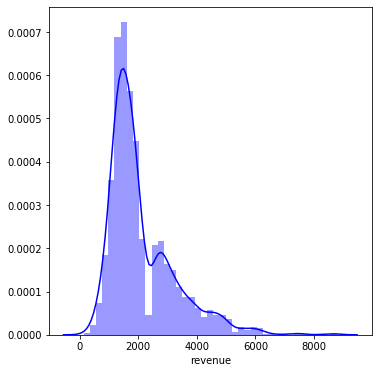

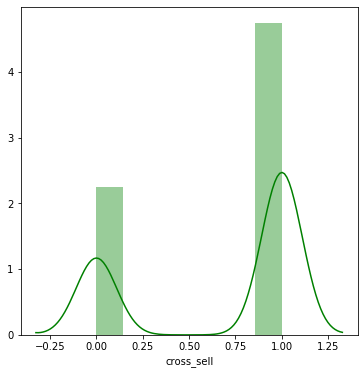

Unable to plot a Histogram
Unable to plot a Histogram
Unable to plot a Histogram
Unable to plot a Histogram


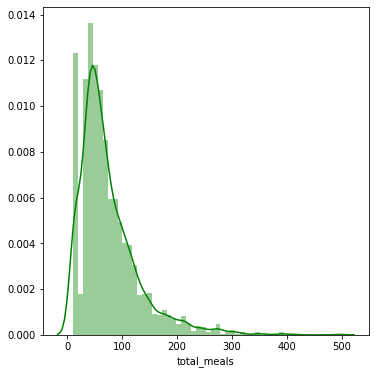

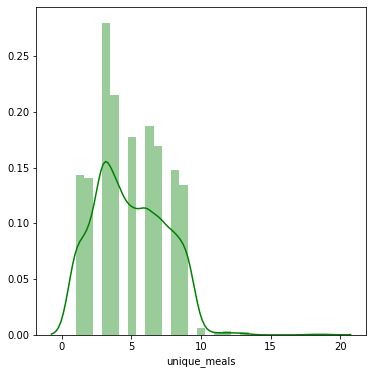

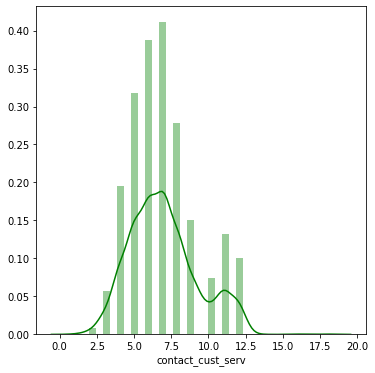

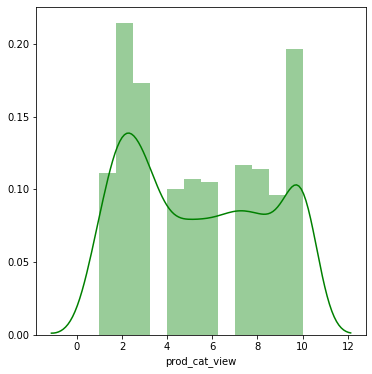

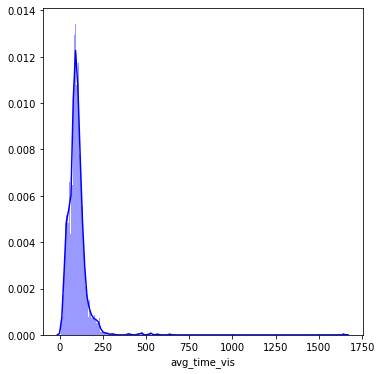

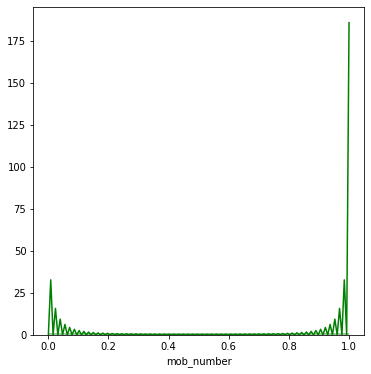

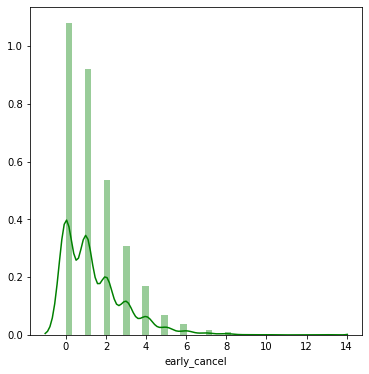

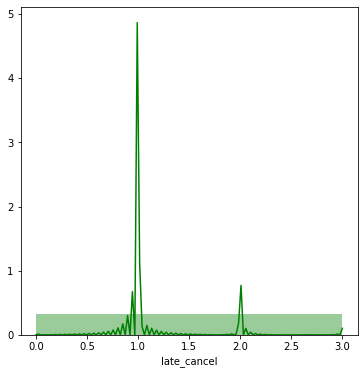

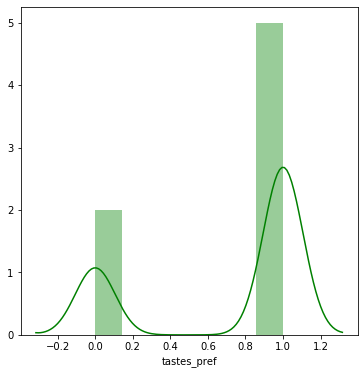

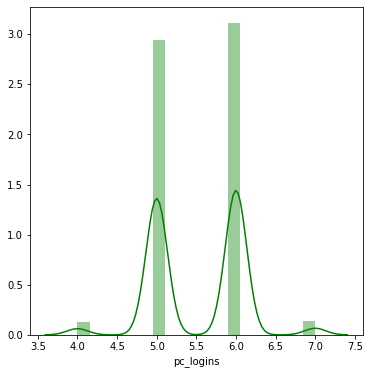

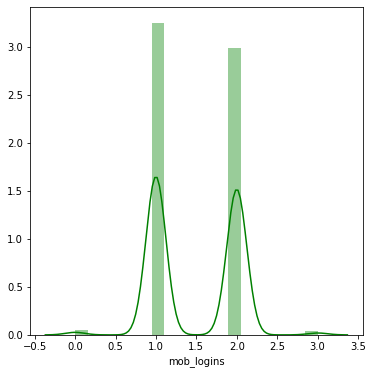

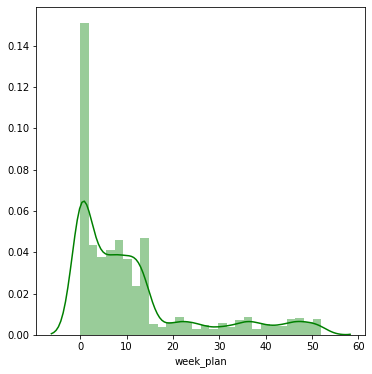

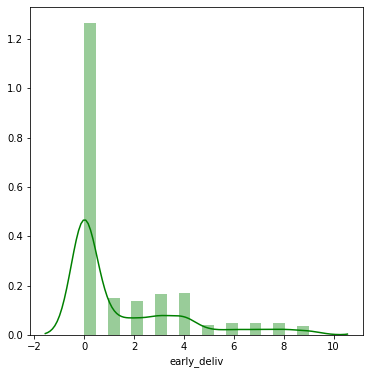

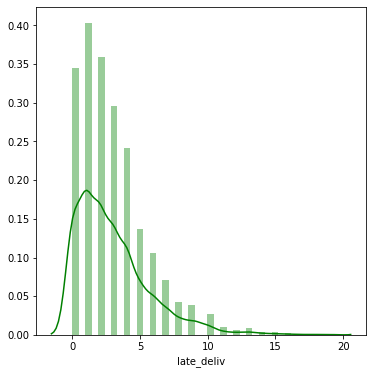

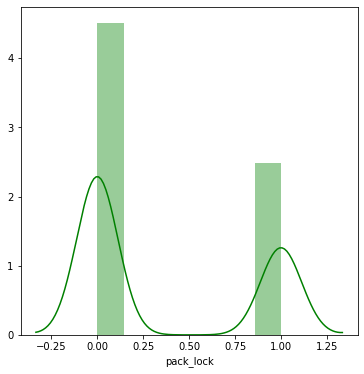

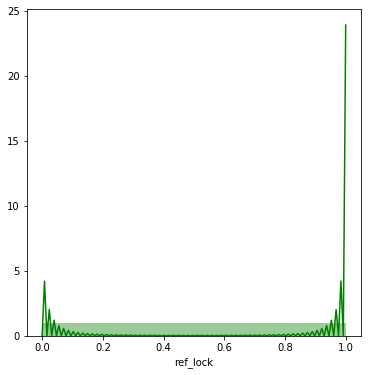

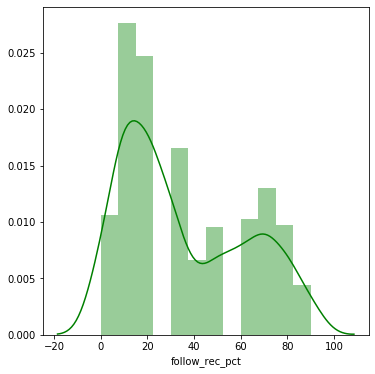

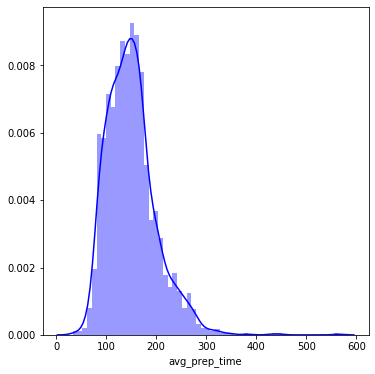

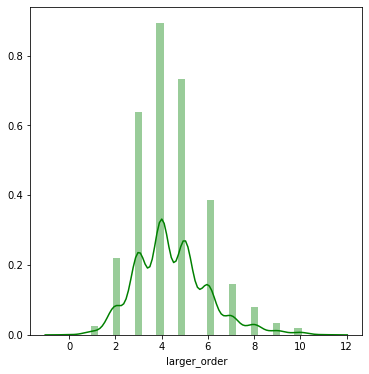

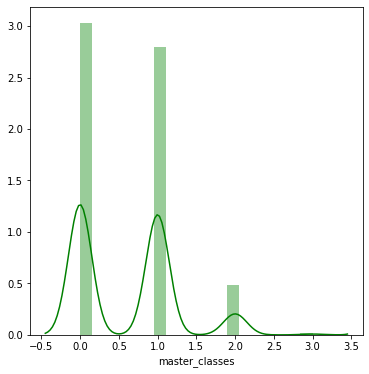

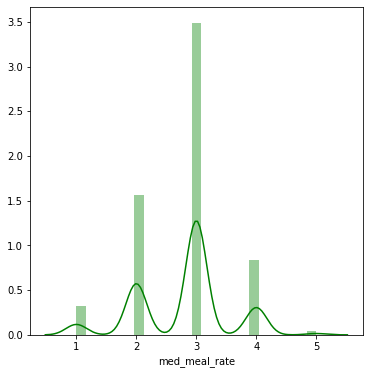

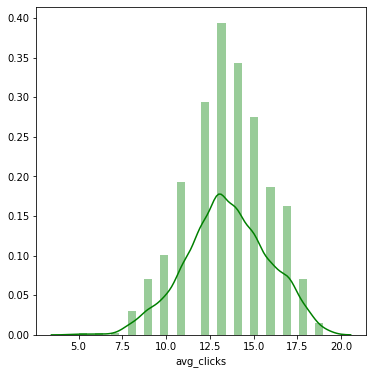

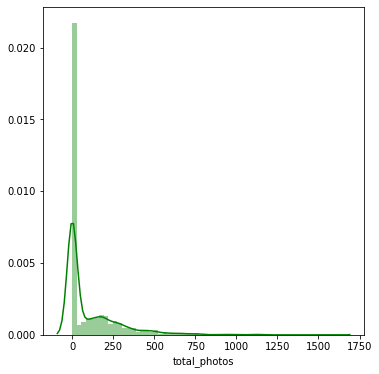

Unable to plot a Histogram


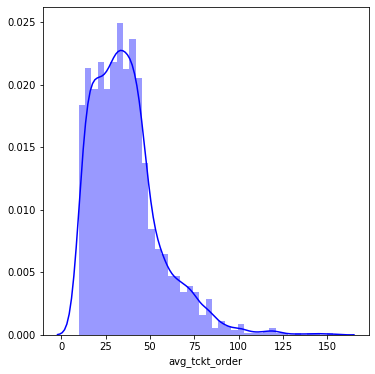

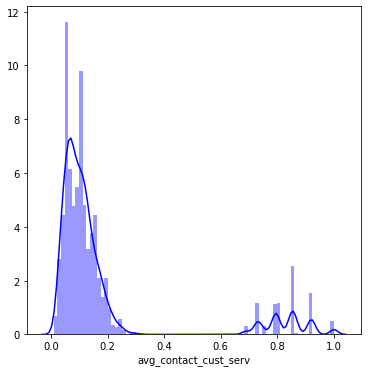

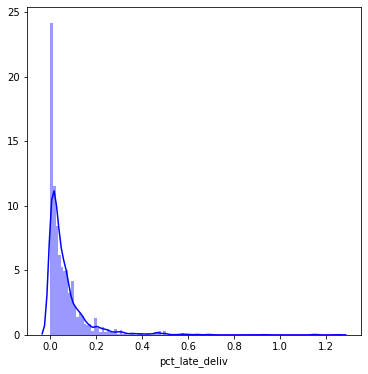

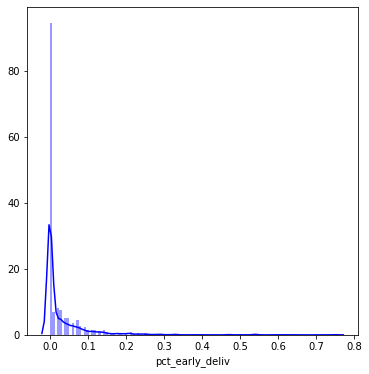

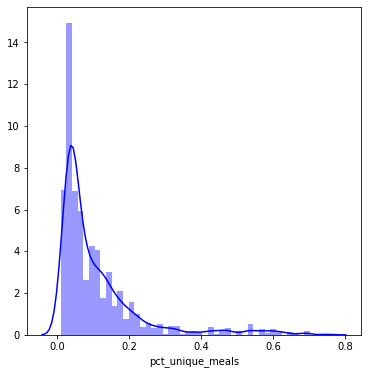

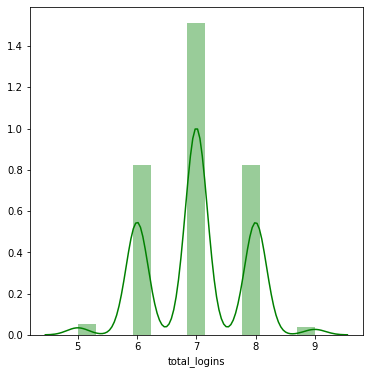

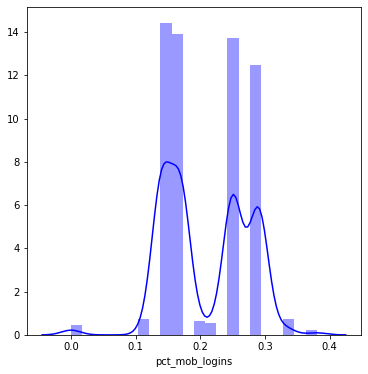

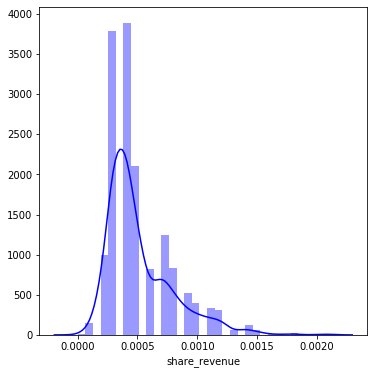

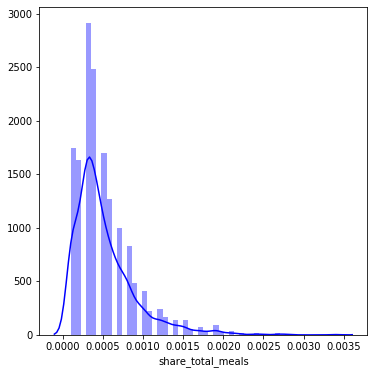

Unable to plot a Histogram
Unable to plot a Histogram
Unable to plot a Histogram
Unable to plot a Histogram
Unable to plot a Histogram


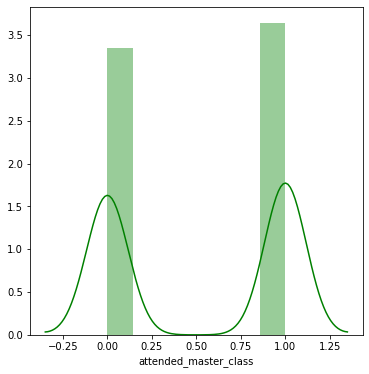

In [10]:
# Plotting histogram: 
for plot in app_chef:
    if app_chef[plot].dtypes == 'int64':
        fig, ax = plt.subplots(figsize = (10, 10))
        plt.subplot(2, 2, 1)
        sns.distplot(app_chef[plot],
                 bins  = 'fd',
                 color = 'g')
        plt.xlabel(plot)
        plt.tight_layout()
        plt.show()
    elif app_chef[plot].dtypes == 'float64':
        fig, ax = plt.subplots(figsize = (10, 10)) #makes plot bigger
        plt.subplot(2, 2, 1)
        sns.distplot(app_chef[plot],
                 bins  = 'fd',
                 color = 'b')
        plt.xlabel(plot)
        plt.tight_layout()
        plt.show()
    else:
        print('Unable to plot a Histogram')

In [11]:
# Setting outlier thresholds: 

# Explanatory variables:
avg_time_hi              = 250
avg_prep_lo              = 70
avg_prep_hi              = 280
total_meals_hi           = 250
unique_meals_hi          = 10
cont_cust_serv_lo        = 2.5
cont_cust_serv_hi        = 12.5
canc_bef_noon_hi         = 6
late_deliv_hi            = 10
larg_order_lo            = 2
larg_order_hi            = 8
avg_clicks_lo            = 8
avg_clicks_hi            = 18
total_photos_hi          = 500
avg_tckt_order_hi        = 80
avg_contact_cust_serv_hi = 0.3
pct_late_deliv_hi        = 0.3
pct_early_deliv_hi       = 0.15
share_total_meals_hi     = 0.0018
pct_unique_meals_hi      = 0.3

# Average visit time:
app_chef['out_avg_time_hi'] = 0
condition_hi = app_chef.loc[0:,'out_avg_time_hi'][app_chef['avg_time_vis'] > avg_time_hi]

app_chef['out_avg_time_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Average preparation time:
## Low:
app_chef['out_avg_prep_lo'] = 0
condition_hi = app_chef.loc[0:,'out_avg_prep_lo'][app_chef['avg_prep_time'] < avg_prep_lo]

app_chef['out_avg_prep_lo'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

## High
app_chef['out_avg_prep_hi'] = 0
condition_hi = app_chef.loc[0:,'out_avg_prep_hi'][app_chef['avg_prep_time'] > avg_prep_hi]

app_chef['out_avg_prep_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Total Meals:
app_chef['out_total_meals_hi'] = 0
condition_hi = app_chef.loc[0:,'out_total_meals_hi'][app_chef['total_meals'] > total_meals_hi]

app_chef['out_total_meals_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Unique Meals:
app_chef['out_unique_meals_hi'] = 0
condition_hi = app_chef.loc[0:,'out_unique_meals_hi'][app_chef['unique_meals'] > unique_meals_hi]

app_chef['out_unique_meals_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Contact customer service:
## High
app_chef['out_cont_cust_serv_lo'] = 0
condition_hi = app_chef.loc[0:,'out_cont_cust_serv_lo'][app_chef['contact_cust_serv'] < cont_cust_serv_lo]

app_chef['out_cont_cust_serv_lo'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

## Low
app_chef['out_cont_cust_serv_hi'] = 0
condition_hi = app_chef.loc[0:,'out_cont_cust_serv_hi'][app_chef['contact_cust_serv'] > cont_cust_serv_hi]

app_chef['out_cont_cust_serv_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Cancelation before noon:
app_chef['out_canc_bef_noon_hi'] = 0
condition_hi = app_chef.loc[0:,'out_canc_bef_noon_hi'][app_chef['late_cancel'] > canc_bef_noon_hi]

app_chef['out_canc_bef_noon_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Late Deliveries:
app_chef['out_late_deliv_hi'] = 0
condition_hi = app_chef.loc[0:,'out_late_deliv_hi'][app_chef['late_deliv'] > late_deliv_hi]

app_chef['out_late_deliv_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Largest order per customer:
## Low
app_chef['out_larg_order_lo'] = 0
condition_hi = app_chef.loc[0:,'out_larg_order_lo'][app_chef['larger_order'] < larg_order_lo]

app_chef['out_larg_order_lo'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

## High
app_chef['out_larg_order_hi'] = 0
condition_hi = app_chef.loc[0:,'out_larg_order_hi'][app_chef['larger_order'] > larg_order_hi]

app_chef['out_larg_order_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Average clicks:
## Low
app_chef['out_avg_clicks_lo'] = 0
condition_hi = app_chef.loc[0:,'out_avg_clicks_lo'][app_chef['avg_clicks'] < avg_clicks_lo]

app_chef['out_avg_clicks_lo'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
## High
app_chef['out_avg_clicks_hi'] = 0
condition_hi = app_chef.loc[0:,'out_avg_clicks_hi'][app_chef['avg_clicks'] > avg_clicks_hi]

app_chef['out_avg_clicks_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Total Photos:
app_chef['out_total_photos_hi'] = 0
condition_hi = app_chef.loc[0:,'out_total_photos_hi'][app_chef['total_photos'] > total_photos_hi]

app_chef['out_total_photos_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Late Deliveries (% of total):
app_chef['out_pct_late_deliv_hi'] = 0
condition_hi = app_chef.loc[0:,'out_pct_late_deliv_hi'][app_chef['pct_late_deliv'] > pct_late_deliv_hi]

app_chef['out_pct_late_deliv_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Early Deliveries (% of total):
app_chef['out_pct_early_deliv_hi'] = 0
condition_hi = app_chef.loc[0:,'out_pct_early_deliv_hi'][app_chef['pct_early_deliv'] > pct_early_deliv_hi]

app_chef['out_pct_early_deliv_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Total meals:
app_chef['out_share_total_meals_hi'] = 0
condition_hi = app_chef.loc[0:,'out_share_total_meals_hi'][app_chef['share_total_meals'] > share_total_meals_hi]

app_chef['out_share_total_meals_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Response variable:
revenue_hi       = 5000
share_revenue_hi = 0.0013

# Revenue:
app_chef['out_revenue_hi'] = 0
condition_hi = app_chef.loc[0:,'out_revenue_hi'][app_chef['revenue'] > revenue_hi]

app_chef['out_revenue_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Share revenue:
app_chef['out_share_revenue_hi'] = 0
condition_hi = app_chef.loc[0:,'out_share_revenue_hi'][app_chef['share_revenue'] > share_revenue_hi]

app_chef['out_share_revenue_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Ratio unique meals:
app_chef['out_pct_unique_meals'] = 0
condition_hi = app_chef.loc[0:,'out_pct_unique_meals'][app_chef['pct_unique_meals'] > pct_unique_meals_hi]

app_chef['out_pct_unique_meals'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

In [12]:
# Creating one binary variable per categorical type: 

# For rating category, we will create a different column per different rank (1 to 5)
# For email domain, we will create one column for 'professional' and another for 'personal'

# Generating binary categorical variables
one_hot_med_meal_rate = pd.get_dummies(app_chef['rating_category'])
one_hot_domain_group = pd.get_dummies(app_chef['domain_group'])
one_hot_cust_serv_status = pd.get_dummies(app_chef['cust_serv_status'])
one_hot_follow_rec_category = pd.get_dummies(app_chef['follow_rec_category'])

# Including binary variables in the dataframe
app_chef = app_chef.join([one_hot_med_meal_rate, one_hot_domain_group, 
                          one_hot_cust_serv_status, one_hot_follow_rec_category])

In [42]:
app_chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 76 columns):
revenue                     1946 non-null float64
cross_sell                  1946 non-null int64
name                        1946 non-null object
email                       1946 non-null object
first_name                  1946 non-null object
family_name                 1946 non-null object
total_meals                 1946 non-null int64
unique_meals                1946 non-null int64
contact_cust_serv           1946 non-null int64
prod_cat_view               1946 non-null int64
avg_time_vis                1946 non-null float64
mob_number                  1946 non-null int64
early_cancel                1946 non-null int64
late_cancel                 1946 non-null int64
tastes_pref                 1946 non-null int64
pc_logins                   1946 non-null int64
mob_logins                  1946 non-null int64
week_plan                   1946 non-null int64
early_deliv          

In [13]:
# Ranking correlations with cross_sell: 
app_chef_corr = app_chef.corr().round(2)
app_chef_corr.loc['cross_sell'].sort_values(ascending = False)

cross_sell              1.00
follow_rec_pct          0.46
Sometimes               0.45
Frequently              0.24
business                0.19
                        ... 
pct_mob_logins         -0.06
out_avg_clicks_hi      -0.07
junk                   -0.28
Rarely                 -0.56
out_canc_bef_noon_hi     NaN
Name: cross_sell, Length: 67, dtype: float64

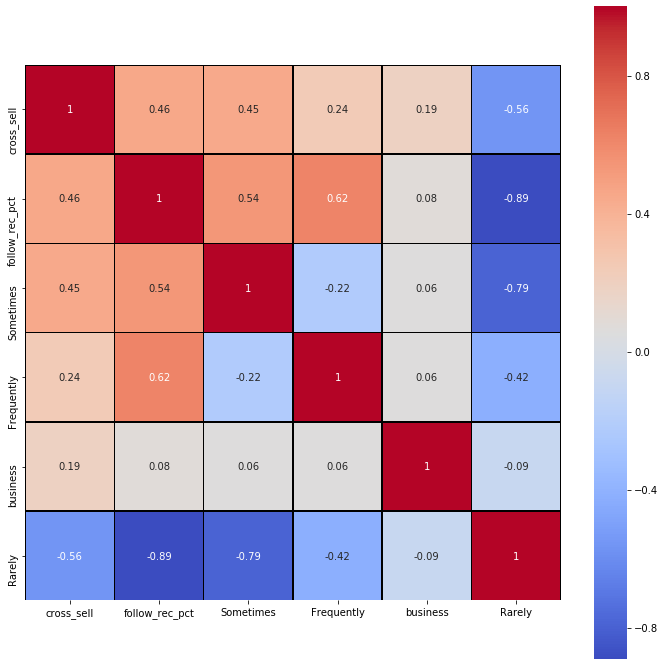

In [14]:
# Plotting correlation matrix: 
fig, ax = plt.subplots(figsize=(12,12))
app_chef_corr2 = app_chef_corr.loc[['cross_sell','follow_rec_pct','Sometimes','Frequently',
                       'business','Rarely'], 
                       ['cross_sell','follow_rec_pct','Sometimes','Frequently',
                       'business','Rarely']]
sns.heatmap(app_chef_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)
plt.show()

With that correlation matrix analysis we already have a prior insight that an important feature
for the cross-sell success is the variable <strong>"Followed Recommendations"</strong>. <br>

Besides that, we get a hypothesis that <strong>"business email accounts"</strong> are more likely to convert that promotion.

Let's now check in if these assumptions are corroborated by our models.

***
<h3> Classification Model </h3>

In [15]:
# Setting explanatory and response variable 

# Explanatory variable:
app_chef_data   = app_chef.drop(['cross_sell'], axis = 1)

# Dropping discrete variables: 
app_chef_data = app_chef_data.drop(['name','email','first_name','family_name',
                                                  'domain', 'domain_group', 'rating_category',
                                                 'cust_serv_status', 'follow_rec_category'],axis = 1)

# Preparing the target variable
app_chef_target = app_chef.loc[ : , 'cross_sell']

In [16]:
# Splitting dataset in train and test with stratification:  
X_train, X_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            test_size = 0.25,
            random_state = 222,
            stratify = app_chef_target)

# Creating training dataset for statsmodel:
app_chef_train = pd.concat([X_train, y_train], axis = 1)

# Printing explanatory variables in the format to be included in the model:
for val in app_chef_data:
    print(f"{val} +")

revenue +
total_meals +
unique_meals +
contact_cust_serv +
prod_cat_view +
avg_time_vis +
mob_number +
early_cancel +
late_cancel +
tastes_pref +
pc_logins +
mob_logins +
week_plan +
early_deliv +
late_deliv +
pack_lock +
ref_lock +
follow_rec_pct +
avg_prep_time +
larger_order +
master_classes +
med_meal_rate +
avg_clicks +
total_photos +
m_family_name +
avg_tckt_order +
avg_contact_cust_serv +
pct_late_deliv +
pct_early_deliv +
pct_unique_meals +
total_logins +
pct_mob_logins +
share_revenue +
share_total_meals +
attended_master_class +
out_avg_time_hi +
out_avg_prep_lo +
out_avg_prep_hi +
out_total_meals_hi +
out_unique_meals_hi +
out_cont_cust_serv_lo +
out_cont_cust_serv_hi +
out_canc_bef_noon_hi +
out_late_deliv_hi +
out_larg_order_lo +
out_larg_order_hi +
out_avg_clicks_lo +
out_avg_clicks_hi +
out_total_photos_hi +
out_pct_late_deliv_hi +
out_pct_early_deliv_hi +
out_share_total_meals_hi +
out_revenue_hi +
out_share_revenue_hi +
out_pct_unique_meals +
Negative +
Neutral +
Posit

In [17]:
# Creating empty dataframe to compare models: 
model_performance = []

<h4> Logistic Regression Model </h4>

In [18]:
## Setting Logistic Regression will all explanatory variables: 
# Building model
logistic_full = smf.logit(formula = """ cross_sell ~
                                        revenue +
                                        total_meals +
                                        unique_meals +
                                        contact_cust_serv +
                                        prod_cat_view +
                                        avg_time_vis +
                                        early_cancel +
                                        late_cancel +
                                        tastes_pref +
                                        week_plan +
                                        early_deliv +
                                        late_deliv +
                                        pack_lock +
                                        ref_lock +
                                        follow_rec_pct +
                                        avg_prep_time +
                                        larger_order +
                                        med_meal_rate +
                                        avg_clicks +
                                        total_photos +
                                        m_family_name +
                                        avg_tckt_order +
                                        avg_contact_cust_serv +
                                        pct_late_deliv +
                                        pct_early_deliv +
                                        pct_unique_meals +
                                        total_logins +
                                        pct_mob_logins +
                                        attended_master_class +
                                        out_avg_time_hi +
                                        out_avg_prep_lo +
                                        out_avg_prep_hi +
                                        out_total_meals_hi +
                                        out_unique_meals_hi +
                                        out_late_deliv_hi +
                                        out_larg_order_lo +
                                        out_larg_order_hi +
                                        out_avg_clicks_lo +
                                        out_avg_clicks_hi +
                                        out_total_photos_hi +
                                        out_pct_late_deliv_hi +
                                        out_pct_early_deliv_hi +
                                        out_revenue_hi +
                                        out_pct_unique_meals +
                                        Negative +
                                        Positive +
                                        business +
                                        Unhappy +
                                        Frequently +
                                        Rarely """,
                                        data = app_chef_train)

# We removed the following variables to allow the model to run: 'pc_logins', 'mobile_logins','mob_number','share_revenue',
# 'share_total_meals', 'Neutral','personal','Satisfied','Sometimes'

# Fitting the model object
results_full = logistic_full.fit()


# Checking summary to get the most significant variables
results_full.summary()

         Current function value: 0.360010
         Iterations: 35


C:\Users\thiag\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             cross_sell   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1408
Method:                           MLE   Df Model:                           50
Date:                Sat, 25 Apr 2020   Pseudo R-squ.:                  0.4267
Time:                        21:47:10   Log-Likelihood:                -525.25
converged:                      False   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                4.600e-132
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 37.8479   1.61e+04      0.002      0.998   -3.15e+04    3.16e+04
revenue                   -0.0005      0.000     -2.206      0.027      -0.001   -5.34e-05
total_meals                0.0014      0.004      0.379      0.705      -0.006       0.009
unique_meals               0.1450      0.058      2.494      0.013       0.031       0.259
contact_cust_serv          0.0461      0.081      0.572      0.567      -0.112       0.204
prod_cat_view             -0.0076      0.025     -0.299      0.765      -0.057       0.042
avg_time_vis               0.0018      0.002      1.076      0.282      -0.002       0.005
early_cancel               0.2551      0.054      4.764      0.000       0.150       0.360
late_cancel               -0.2513      0.174     -1.444      0.149      -0.592       0.090
tastes_pref                0.3322      0.167      1.993      0.046       0.005       0.659
week_plan                 -0.0020      0.006     -0.366      0.714      -0.013       0.009
early_deliv                0.0425      0.054      0.786      0.432      -0.063       0.149
late_deliv                -0.0054      0.047     -0.116      0.908      -0.097       0.086
pack_lock                 -0.0489      0.180     -0.271      0.786      -0.402       0.305
ref_lock                   0.2772      0.283      0.980      0.327      -0.277       0.832
follow_rec_pct            -0.0330      0.008     -4.091      0.000      -0.049      -0.017
avg_prep_time              0.0010      0.004      0.267      0.790      -0.006       0.008
larger_order               0.0113      0.094      0.121      0.904      -0.172       0.195
med_meal_rate              0.0110      0.428      0.026      0.980      -0.828       0.850
avg_clicks                -0.0557      0.067     -0.827      0.408      -0.188       0.076
total_photos               0.0008      0.001      1.160      0.246      -0.001       0.002
m_family_name              0.5035      0.478      1.052      0.293      -0.434       1.441
avg_tckt_order             0.0119      0.011      1.109      0.267      -0.009       0.033
avg_contact_cust_serv      1.5029      3.057      0.492      0.623      -4.489       7.495
pct_late_deliv             1.3685      1.945      0.704      0.482      -2.443       5.180
pct_early_deliv           -0.1261      2.241     -0.056      0.955      -4.517       4.265
pct_unique_meals          -6.7814      2.386     -2.842      0.004     -11.458      -2.105
total_logins               0.0326      0.103      0.315      0.753      -0.170       0.235
pct_mob_logins            -2.2932      1.303     -1.760      0.078      -4.847       0.261
attended_master_class      0.2233      0.183      1.221      0.222      -0.135       0.582
out_avg_time_hi            0.1874      0.850      0.220      0.826      -1.479       1.854
out_avg_prep_lo            0.6350      0.839      0.757      0.449      -1.010       2.280
out_avg_prep_hi            0.2152      1.003      0.215 

<strong>As criteria, it was considered as significant variables with p-value lower than 0.10.</strong>

In [19]:
## Defining significant variables: 
# Building model only with significant variables (p-value lower than 0.1)
logit_sig = smf.logit(formula = """ cross_sell ~
                                        unique_meals +
                                        early_cancel +
                                        tastes_pref +
                                        follow_rec_pct +
                                        pct_unique_meals +
                                        out_revenue_hi +
                                        out_pct_unique_meals +
                                        pct_mob_logins +
                                        business """,
                                            data    = app_chef_train)

# Fitting:
logit_sig = logit_sig.fit()

# Checking summary:
logit_sig.summary()

Optimization terminated successfully.
         Current function value: 0.458434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             cross_sell   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1449
Method:                           MLE   Df Model:                            9
Date:                Sat, 25 Apr 2020   Pseudo R-squ.:                  0.2700
Time:                        21:47:11   Log-Likelihood:                -668.85
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                7.929e-101
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.2942      0.304     -4.258      0.000      -1.890      -0.698
unique_meals             0.0720      0.033      2.196      0.028       0.008       0.136
early_cancel             0.2358      0.049      4.804      0.000       0.140       0.332
tastes_pref              0.3563      0.146      2.439      0.015       0.070       0.643
follow_rec_pct           0.0586      0.004     14.974      0.000       0.051       0.066
pct_unique_meals        -2.8495      1.161     -2.454      0.014      -5.125      -0.574
out_revenue_hi           0.4471      0.534      0.837      0.403      -0.600       1.494
out_pct_unique_meals     0.6268      0.495      1.266      0.205      -0.344       1.597
pct_mob_logins          -2.7978      1.049     -2.666      0.008      -4.855      -0.741
business                 1.0604      0.149      7.103      0.000       0.768       1.353
========================================================================================
"""

In [20]:
## Creating a dictionary to store different variable packs: 

candidate_dict = {

 # Model with all explanatory variables:
 'logit_full'   : ['revenue','total_meals','unique_meals','contact_cust_serv','prod_cat_view',
                     'avg_time_vis','early_cancel','late_cancel','tastes_pref','week_plan',
                     'early_deliv','late_deliv','pack_lock','ref_lock','follow_rec_pct','avg_prep_time',
                     'larger_order','med_meal_rate','avg_clicks','total_photos','m_family_name','avg_tckt_order',
                     'avg_contact_cust_serv','pct_late_deliv','pct_early_deliv','pct_unique_meals','total_logins',
                     'pct_mob_logins','attended_master_class','out_avg_time_hi','out_avg_prep_lo','out_avg_prep_hi',
                     'out_total_meals_hi','out_unique_meals_hi','out_late_deliv_hi','out_larg_order_lo',
                     'out_larg_order_hi','out_avg_clicks_lo','out_avg_clicks_hi','out_total_photos_hi',
                     'out_pct_late_deliv_hi','out_pct_early_deliv_hi','out_revenue_hi','out_pct_unique_meals',
                     'Negative','Positive','business','Unhappy','Frequently','Rarely'],
 
 # Model only with significant variables:
 'logit_sig'    : ['unique_meals','early_cancel','tastes_pref','follow_rec_pct','pct_unique_meals',
                     'out_revenue_hi','out_pct_unique_meals','pct_mob_logins','business'],
    
 'tree_sig'     : []

}

In [21]:
# Creating function to plot a Confusion Matrix: 

def visual_cm(true_y, pred_y, labels = None):
    # Defining labels:
    lbls = labels

    # Creating confusion matrix:
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)

    # Plotting heatmap:
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [22]:
## Model with all variables: 
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_full']]
app_chef_target =  app_chef.loc[ : , 'cross_sell']


# Splitting dataset in train and test:
X_train, X_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = app_chef['follow_rec_pct'])

# Instantiating:
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# Fitting:
logreg_fit = logreg.fit(X_train, y_train)


# Predicting:
logreg_pred = logreg_fit.predict(X_test)

# Getting Area Under the ROC Curve (AUC): 
roc_auc_score(y_true  = y_test,
              y_score = logreg_pred)

# Scoring:
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred))

# Adding model results to consolidated table:
model_performance.append(['Logistic Regression: all',
                          logreg_fit.score(X_train, y_train).round(4),
                          logreg_fit.score(X_test, y_test).round(4),
                          roc_auc_score(y_true  = y_test,
                                        y_score = logreg_pred).round(4)])

Training ACCURACY: 0.6854
Testing  ACCURACY: 0.6838
AUC Score        : 0.6311087168645308


C:\Users\thiag\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
## Standardized model with all variables: 
# Divide a standardized data set into train and test variable to run models side by side
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_full']]
app_chef_target =  app_chef.loc[ : , 'cross_sell']

# Instantiating StandardScaler()
scaler = StandardScaler()

# Fitting:
scaler.fit(app_chef_data)


# Tranforming the independent variable data:
X_scaled     = scaler.transform(app_chef_data)


# Converting to a DataFrame:
X_scaled_df  = pd.DataFrame(X_scaled) 


# Spliting dataset again, now with scaled data:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled_df,
                    app_chef_target,
                    random_state = 222,
                    test_size = 0.25,
                    stratify = app_chef['follow_rec_pct'])
# Instantiating:
logreg = LogisticRegression(solver = 'liblinear',
                            C = 1,
                            random_state = 222)


# Fitting:
logreg_fit = logreg.fit(X_train_scaled, y_train_scaled)


# Predicting:
logreg_pred = logreg_fit.predict(X_test_scaled)


# Scoring:
print('Training ACCURACY:', logreg_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = logreg_pred))

# Adding model results to consolidated table:
model_performance.append(['Logistic Regression: standard/all',
                          logreg_fit.score(X_train_scaled, y_train_scaled).round(4),
                          logreg_fit.score(X_test_scaled, y_test_scaled).round(4),
                          roc_auc_score(y_true  = y_test_scaled,
                                        y_score = logreg_pred).round(4)])

Training ACCURACY: 0.8012
Testing  ACCURACY: 0.768
AUC Score        : 0.7683363148479426


In [24]:
## Model with significant variables: 
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_sig']]
app_chef_target =  app_chef.loc[ : , 'cross_sell']


# Splitting dataset:
X_train, X_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = app_chef['follow_rec_pct'])

# Instantiating:
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)

# Fitting:
logreg_fit = logreg.fit(X_train, y_train)

# Predicting:
logreg_pred = logreg_fit.predict(X_test)

# Getting Area Under the ROC Curve (AUC): 
roc_auc_score(y_true  = y_test,
              y_score = logreg_pred)

# Scoring:
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred))

# Adding model results to consolidated table:
model_performance.append(['Logistic Regression: significant',
                          logreg_fit.score(X_train, y_train).round(4),
                          logreg_fit.score(X_test, y_test).round(4),
                          roc_auc_score(y_true  = y_test,
                                        y_score = logreg_pred).round(4)])

Training ACCURACY: 0.7375
Testing  ACCURACY: 0.7331
AUC Score        : 0.6986806797853309


C:\Users\thiag\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
## Standardized model with significant variables: 
# Divide a standardized data set into train and test variable to run models side by side
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_sig']]
app_chef_target =  app_chef.loc[ : , 'cross_sell']

# Instantiating:
scaler = StandardScaler()

# Fitting:
scaler.fit(app_chef_data)


# Transforming the independent variable data:
X_scaled     = scaler.transform(app_chef_data)


# Converting to a DataFrame:
X_scaled_df  = pd.DataFrame(X_scaled) 


# Spliting dataset again, now with scaled data:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled_df,
                    app_chef_target,
                    random_state = 222,
                    test_size = 0.25,
                    stratify = app_chef['follow_rec_pct'])
# Instantiating:
logreg = LogisticRegression(solver = 'liblinear',
                            C = 1,
                            random_state = 222)


# Fitting:
logreg_fit = logreg.fit(X_train_scaled, y_train_scaled)


# Predicting:
logreg_pred = logreg_fit.predict(X_test_scaled)


# Scoring:
print('Training ACCURACY:', logreg_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = logreg_pred))

# Adding model results to consolidated table:
model_performance.append(['Logistic Regression: standard/significant',
                          logreg_fit.score(X_train_scaled, y_train_scaled).round(4),
                          logreg_fit.score(X_test_scaled, y_test_scaled).round(4),
                          roc_auc_score(y_true  = y_test_scaled,
                                        y_score = logreg_pred).round(4)])

Training ACCURACY: 0.7498
Testing  ACCURACY: 0.7351
AUC Score        : 0.7083062286550659


<h4> KNN: Neighbors Regressor Classifier </h4>

In [26]:
# Creating function to get optimal_neighbors: 
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=222,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):    
    
    if standardize == True:
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df

    # Splitting:
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)

    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    # Setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)

    for n_neighbors in neighbors_settings:
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
             
        # Scoring:
        training_accuracy.append(clf.score(X_train, y_train))
        test_accuracy.append(clf.score(X_test, y_test))


    # Plotting accuracy:
    if show_viz == True:
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show() 
    
    # Getting optimal number of neighbors:
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

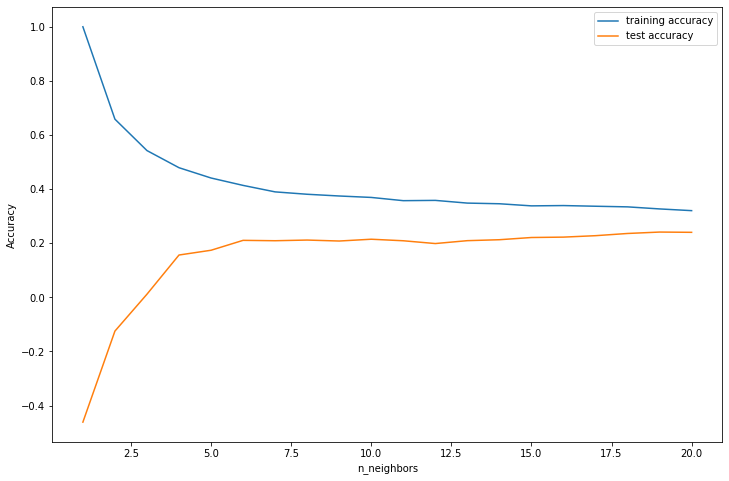

The optimal number of neighbors is: 19
Training ACCURACY: 0.7019
Testing  ACCURACY: 0.7002
AUC Score        : 0.5426


In [27]:
## Model with all variables: 
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_full']]
app_chef_target =  app_chef.loc[ : , 'cross_sell']


# Note that we used the most significant variable to stratify
X_train, X_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = app_chef['follow_rec_pct'])

# Instantiating:
knn_opt = KNeighborsClassifier(n_neighbors = optimal_neighbors(X_train, 
                                                               y_train))

# Fitting:
knn_fit = knn_opt.fit(X_train, y_train)

# Predicting:
knn_pred = knn_fit.predict(X_test)

# Scoring:
print('Training ACCURACY:', knn_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

# Adding model results to consolidated table:
model_performance.append(['KNN Classification: all',
                          knn_fit.score(X_train, y_train).round(4),
                          knn_fit.score(X_test, y_test).round(4),
                          roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)])

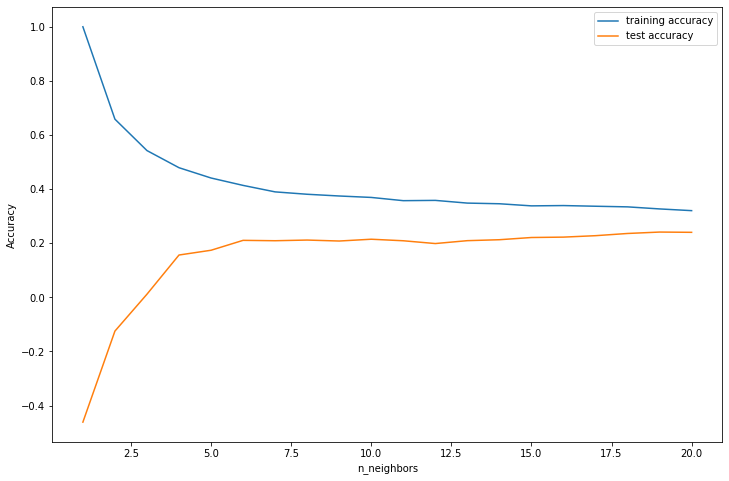

The optimal number of neighbors is: 19
Training ACCURACY: 0.7629
Testing  ACCURACY: 0.7413
AUC Score        : 0.6902


In [28]:
## Standardized model with all variables: 
# Divide a standardized data set into train and test variable to run models side by side
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_full']]
app_chef_target =  app_chef.loc[ : , 'cross_sell']

# Instantiating StandardScaler()
scaler = StandardScaler()

# Fitting:
scaler.fit(app_chef_data)


# Transforming:
X_scaled     = scaler.transform(app_chef_data)


# Converting to a DataFrame:
X_scaled_df  = pd.DataFrame(X_scaled) 


# Spliting dataset again, now with scaled data:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled_df,
                    app_chef_target,
                    random_state = 222,
                    test_size = 0.25,
                    stratify = app_chef['follow_rec_pct'])

# Instantiating scaled data:
knn_opt = KNeighborsClassifier(n_neighbors = optimal_neighbors(X_train_scaled, 
                                                               y_train_scaled))


# Fitting:
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# Predicting:
knn_pred = knn_fit.predict(X_test_scaled)


# Scoring:
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4))

# Adding model results to consolidated table:
model_performance.append(['KNN Classification: standard/all',
                          knn_fit.score(X_train_scaled, y_train_scaled).round(4),
                          knn_fit.score(X_test_scaled, y_test_scaled).round(4),
                          roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4)])

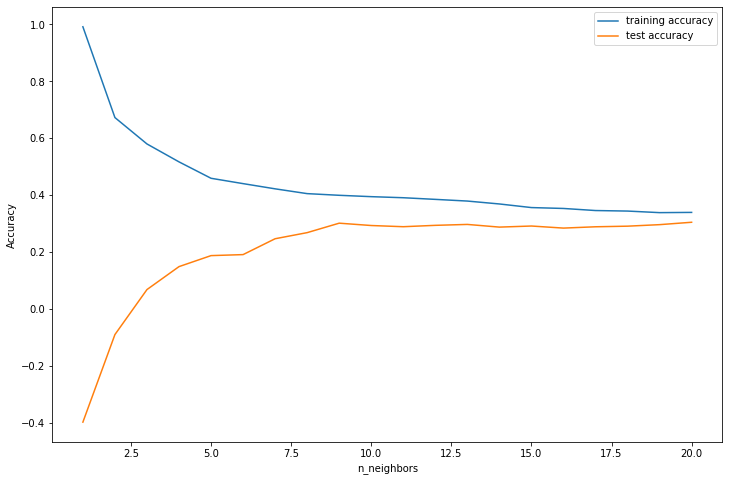

The optimal number of neighbors is: 20
Training ACCURACY: 0.7971
Testing  ACCURACY: 0.7495
AUC Score        : 0.7553


In [29]:
## Model with significant variables: 
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_sig']]
app_chef_target =  app_chef.loc[ : , 'cross_sell']


# Note that we used the most significant variable to stratify
X_train, X_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = app_chef['follow_rec_pct'])

# Instantiating:
knn_opt = KNeighborsClassifier(n_neighbors = optimal_neighbors(X_train, 
                                                               y_train))


# Fitting:
knn_fit = knn_opt.fit(X_train, y_train)


# Predicting:
knn_pred = knn_fit.predict(X_test)


# Scoring:
print('Training ACCURACY:', knn_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

# Adding model results to consolidated table:
model_performance.append(['KNN Classification: significant',
                          knn_fit.score(X_train, y_train).round(4),
                          knn_fit.score(X_test, y_test).round(4),
                          roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)])

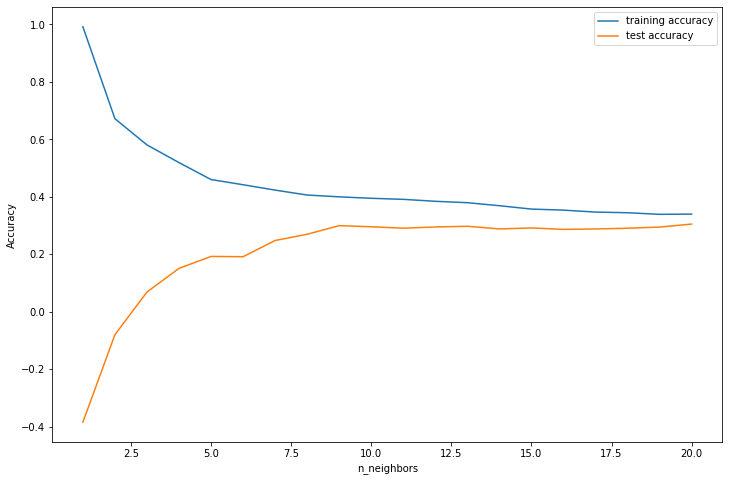

The optimal number of neighbors is: 20
Training ACCURACY: 0.7731
Testing  ACCURACY: 0.7741
AUC Score        : 0.787


In [30]:
## Standardized model with significant variables: 
# Divide a standardized data set into train and test variable to run models side by side
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_sig']]
app_chef_target =  app_chef.loc[ : , 'cross_sell']

# Instantiating StandardScaler():
scaler = StandardScaler()

# Fitting the independent variable data:
scaler.fit(app_chef_data)


# Transforming the independent variable data:
X_scaled     = scaler.transform(app_chef_data)


# Converting to a DataFrame:
X_scaled_df  = pd.DataFrame(X_scaled) 


# Spliting dataset again, now with scaled data:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled_df,
                    app_chef_target,
                    random_state = 222,
                    test_size = 0.25,
                    stratify = app_chef['follow_rec_pct'])

# Instantiating scaled data:
knn_opt = KNeighborsClassifier(n_neighbors = optimal_neighbors(X_train_scaled, 
                                                               y_train_scaled))


# Fitting:
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# Predicting:
knn_pred = knn_fit.predict(X_test_scaled)


# Scoring:
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4))

# Adding model results to consolidated table:
model_performance.append(['KNN Classification: standarda/significant',
                          knn_fit.score(X_train_scaled, y_train_scaled).round(4),
                          knn_fit.score(X_test_scaled, y_test_scaled).round(4),
                          roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4)])

<h4> Decision Tree Classifier </h4>

In [31]:
## Creating function to display tree: 
def display_tree(tree, feature_df, height = 500, width = 800):
    # Visualizing the tree
    dot_data = StringIO()

    # Exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)

    # Declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # Creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

Training ACCURACY: 0.7992
Testing  ACCURACY: 0.807
AUC Score        : 0.7735


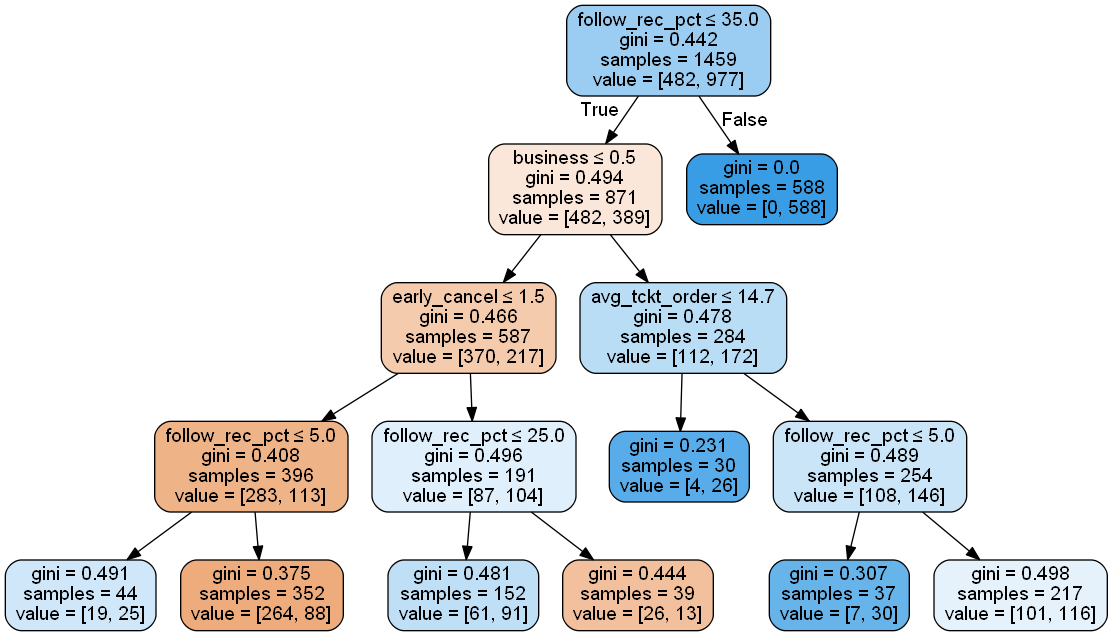

In [32]:
## Model with all variables: 
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_full']]
app_chef_target =  app_chef.loc[ : , 'cross_sell']

# Note that we used the most significant variable to stratify
X_train, X_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = app_chef['follow_rec_pct'])

# Building decision tree model:
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 802)

# Fitting:
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# Predicting:
tree_pred = tree_pruned_fit.predict(X_test)


# Scoring:
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))

# Adding model results to consolidated table:
model_performance.append(['Decision Tree: all',
                          tree_pruned_fit.score(X_train, y_train).round(4),
                          tree_pruned_fit.score(X_test, y_test).round(4),
                          roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4)])

# Plotting tree:
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

Training ACCURACY: 0.8053
Testing  ACCURACY: 0.8008
AUC Score        : 0.7855


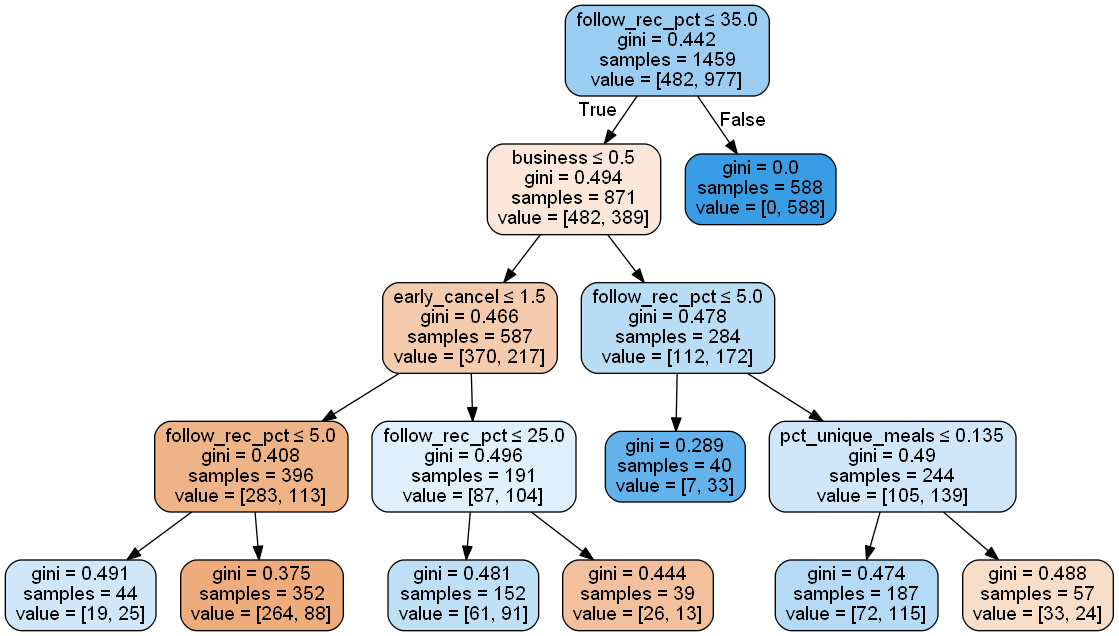

In [33]:
## Model with significant variables: 
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_sig']]
app_chef_target =  app_chef.loc[ : , 'cross_sell']


# Note that we used the most significant variable to stratify
X_train, X_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = app_chef['follow_rec_pct'])

# Building decision tree model:
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 802)

# Fitting:
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# Predicting:
tree_pred = tree_pruned_fit.predict(X_test)

# Scoring:
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))

# Adding model results to consolidated table:
model_performance.append(['Decision Tree: significant',
                          tree_pruned_fit.score(X_train, y_train).round(4),
                          tree_pruned_fit.score(X_test, y_test).round(4),
                          roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4)])

# Plotting tree:
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

<h4> Random Forest Classifier </h4>

In [34]:
## Creating function to plot feature importances: 
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [35]:
## Model with all variables: 
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_full']]
app_chef_target =  app_chef.loc[ : , 'cross_sell']


# Note that we used the most significant variable to stratify
X_train, X_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = app_chef['follow_rec_pct'])

# Instantiating:
rndfor = RandomForestClassifier(criterion = 'gini',
                                bootstrap = True, 
                                max_depth = 4, 
                                n_estimators = 10,
                                min_samples_leaf = 25, 
                                random_state = 222)

# Fitting:
rndfor_fit = rndfor.fit(X_train, y_train)

# Predicting:
rndfor_pred = rndfor_fit.predict(X_test)

# Scoring:
print('Training ACCURACY:', rndfor_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rndfor_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rndfor_pred).round(4))

# Adding model results to consolidated table:
model_performance.append(['Random Forrest: all',
                          rndfor_fit.score(X_train, y_train).round(4),
                          rndfor_fit.score(X_test, y_test).round(4),
                          roc_auc_score(y_true  = y_test,
                                          y_score = rndfor_pred).round(4)])

Training ACCURACY: 0.8053
Testing  ACCURACY: 0.7906
AUC Score        : 0.77


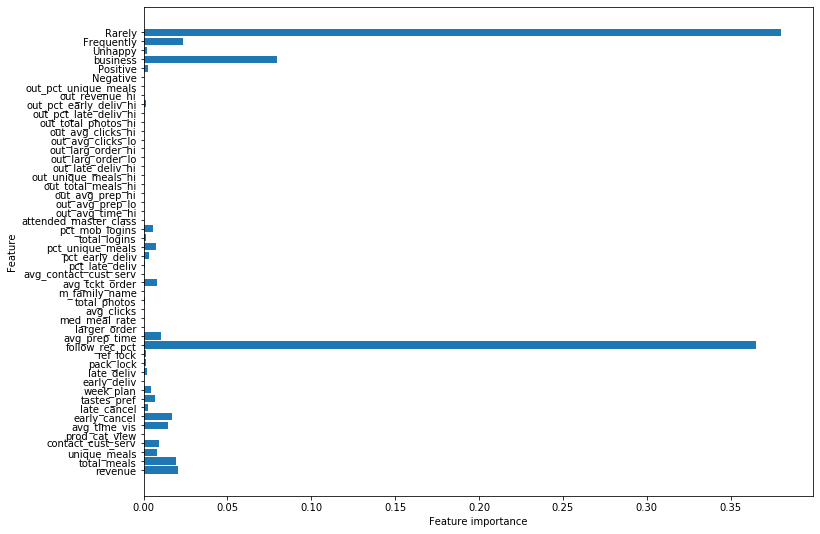

In [36]:
# Plotting feature importance: 
plot_feature_importances(rndfor_fit,
                         train = X_train,
                         export = False)

In [37]:
## Tunned model with all variables: 
#app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_full']]
#app_chef_target =  app_chef.loc[ : , 'cross_sell']

# Declaring a hyperparameter space:
#estimator_space  = pd.np.arange(100, 1100, 250)
#leaf_space       = pd.np.arange(1, 31, 10)
#criterion_space  = ['gini', 'entropy']
#bootstrap_space  = [True, False]
#warm_start_space = [True, False]


# Creating a hyperparameter grid:
#param_grid = {'n_estimators'     : estimator_space,
#              'min_samples_leaf' : leaf_space,
#              'criterion'        : criterion_space,
#              'bootstrap'        : bootstrap_space,
#              'warm_start'       : warm_start_space}


# Instantiating without hyperparameters:
#full_forest_grid = RandomForestClassifier(random_state = 222)


# GridSearchCV object:
#full_forest_cv = GridSearchCV(estimator  = full_forest_grid,
#                              param_grid = param_grid,
#                              cv         = 3,
#                              scoring    = make_scorer(roc_auc_score,
#                                           needs_threshold = False))


# Fitting:
#full_forest_cv.fit(app_chef_data, app_chef_target)

# Instantiating with hyperparameters:
#full_rf_tuned = RandomForestClassifier(bootstrap        = True,
#                                       criterion        = 'gini',
#                                       min_samples_leaf = 11,
#                                       n_estimators     = 850,
#                                       warm_start       = True,
#                                       random_state     = 222)


# Fitting:
#full_rf_tuned_fit = full_rf_tuned.fit(X_train, y_train)


# Predicting:
#full_rf_tuned_pred = full_rf_tuned_fit.predict(X_test)

# Scoring:
#print('Training ACCURACY:', full_rf_tuned_fit.score(X_train, y_train).round(4))
#print('Testing  ACCURACY:', full_rf_tuned_fit.score(X_test, y_test).round(4))
#print('AUC Score        :', roc_auc_score(y_true  = y_test,
#                                          y_score = full_rf_tuned_pred).round(4))

# Adding model results to consolidated table:
model_performance.append(['Tunned Random Forest: all',
                          0.8273,
                          0.7823,
                          0.7703])

<strong>Due to the time to run the tunned model, we ran it once, recorded the results, and commented the cells.</strong>

<h4> Gradient Booster Classifier</h4>

In [38]:
## Model with significant variables: 
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_sig']]
app_chef_target =  app_chef.loc[ : , 'cross_sell']


# Note that we used the most significant variable to stratify
X_train, X_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = app_chef['follow_rec_pct'])

# Instantiating:
g_boost = GradientBoostingClassifier(loss = 'deviance',
                                     criterion = 'mae',
                                     learning_rate =  0.1,
                                     n_estimators = 100,
                                     max_features = 3,
                                     random_state  = 222)

# Fitting:
g_boost_fit = g_boost.fit(X_train, y_train)

# Predicting:
g_boost_pred = g_boost_fit.predict(X_test)

# Scoring:
print('Training ACCURACY:', g_boost_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', g_boost_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = g_boost_pred).round(4))

# Adding model results to consolidated table:
model_performance.append(['GradientBoosting: significant',
                          g_boost_fit.score(X_train, y_train).round(4),
                          g_boost_fit.score(X_test, y_test).round(4),
                          roc_auc_score(y_true  = y_test,
                                          y_score = g_boost_pred).round(4)])

Training ACCURACY: 0.806
Testing  ACCURACY: 0.7844
AUC Score        : 0.7881


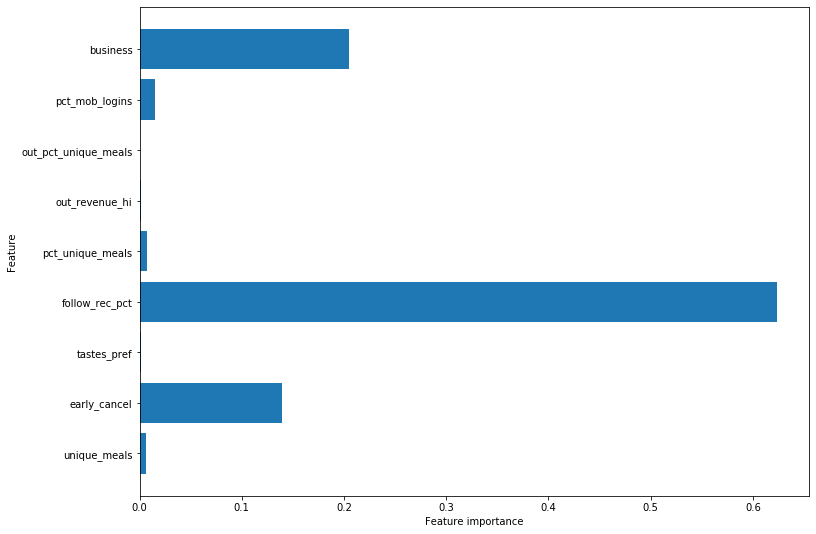

In [39]:
# Plotting feature importance: 
plot_feature_importances(g_boost_fit,
                         train = X_train,
                         export = False)

In [40]:
## Tunned model with significant variables: 
#app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_sig']]
#app_chef_target =  app_chef.loc[ : , 'cross_sell']

# Declaring a hyperparameter space:
#learn_space     = pd.np.arange(0.1, 1.6, 0.3)
#estimator_space = pd.np.arange(50, 250, 50)
#depth_space     = pd.np.arange(1, 10)


# Creating a hyperparameter grid:
#param_grid = {'learning_rate' : learn_space,
#              'max_depth'     : depth_space,
#              'n_estimators'  : estimator_space}


# Instantiating without hyperparameters:
#full_gbm_grid = GradientBoostingClassifier(random_state = 222)


# GridSearchCV object:
#full_gbm_cv = GridSearchCV(estimator  = full_gbm_grid,
#                           param_grid = param_grid,
#                           cv         = 3,
#                           scoring    = make_scorer(roc_auc_score,
#                                        needs_threshold = False))


# Fitting:
#full_gbm_cv.fit(app_chef_data, app_chef_target)

# Instantiating with hyperparameters:
#gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
#                                       max_depth     = 2,
#                                       n_estimators  = 100,
#                                       random_state  = 222)

# Fitting:
#gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)

# Predicting:
#gbm_tuned_pred = gbm_tuned_fit.predict(X_test)

# Scoring:
#print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
#print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
#print('AUC Score        :', roc_auc_score(y_true  = y_test,
#                                          y_score = gbm_tuned_pred).round(4))

# Adding model results to consolidated table:
model_performance.append(['Tunned Gradient Boosting: significant',
                          0.8136,
                          0.7906,
                          0.7905])

<strong>Due to the time to run the tunned model, we ran it once, recorded the results, and commented the cells.</strong>

<h4> Comparing models </h4>

In [41]:
# List of all built models with respective results: 
model_performance = pd.DataFrame(model_performance)
model_performance = model_performance.rename(columns={0: 'Model', 
                                                      1: 'Training Accuracy',
                                                      2: 'Testing Accuracy', 
                                                      3: 'AUC Value'})
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression: all,0.6854,0.6838,0.6311
1,Logistic Regression: standard/all,0.8012,0.7680,0.7683
2,Logistic Regression: significant,0.7375,0.7331,0.6987
3,Logistic Regression: standard/significant,0.7498,0.7351,0.7083
4,KNN Classification: all,0.7019,0.7002,0.5426
5,KNN Classification: standard/all,0.7629,0.7413,0.6902
6,KNN Classification: significant,0.7971,0.7495,0.7553
7,KNN Classification: standarda/significant,0.7731,0.7741,0.7870
8,Decision Tree: all,0.7992,0.8070,0.7735
9,Decision Tree: significant,0.8053,0.8008,0.7855


The champion and recommended model is the <strong>Decision Tree Classifier</strong> using only significant variables. 
<br>
That model returned an <strong>AUC score</strong> of <strong>0.7855</strong> and a <strong>Test Accuracy</strong> of <strong>0.8008</strong>.

***
<h3> Conclusion </h3>

Our analysis aimed to build a model to predict if a customer will be a success or failure when promoting the company's cross-sell promotion. In the process, we realized the variables 'Followed Recommendations' and having a business domain email account are very significant.

Firstly, we got that information in the correlation matrix. Later, the Logistic Regression Model and the Decision Tree also highlighted these variables as being part of the most significant variables, even when we built models with all the variables.

Lastly, comparing the models, we chose the Decision Tree with only significant variables as our champion model. The difference between the accuracy of the train and test dataset are not high (less than 1%), returning a Test Accuracy of 0.8008, and the AUC score is also one of the highest, returning 0.7855.